# FMP Stock Fundamentals Exploration : Sales

Welcome to this Jupyter Notebook of the Finsloth.

In this third Notebook of our series, we are going to explore one key element of FMP Stock Fundamentals which is sales.

Our goal is to understand **the meaning and the structure of each data given by FMP, how to transform it for actual use in any trading or investing strategies**.

## About Financial Modeling Prep

Financial Modeling Prep is a stock market API that provides a wide range of data. Data covers stocks, crypto forex and commodities.

You have addition data such as institutional stock ownership, esg score, price target, etc.

There are several plans including a free one.

I am on a start plan for this notebook. Here are the link for the pricing: https://site.financialmodelingprep.com/developer/docs/pricing/

## What is sales?

Revenue is the money generated from normal business operations, calculated as the average sales price times the number of units sold. It is the top line (or gross income) figure from which costs are subtracted to determine net income. Revenue is also known as sales on the income statement.

Sales plays a key role in analysing the health of a company.

source: https://www.investopedia.com/terms/r/revenue.asp#toc-what-is-revenue

## Diving into Revenue

In this notebook, we are going to dive into what's available for revenue analysis in Financial Model Prep, and how see how we can manipulate the data.

For this notebook, we'll use a data vizualisation, as sales is interesting when it comes to have a graphical view of it.

### Setting up our Notebook 

In [202]:
# We import our librairies

# Data manipulation librairies
import pandas as pd
import numpy as np

# API linked libraries for clean extraction
import requests
import json

# Datavizualisation librairies for graphs
import matplotlib.pyplot as plt

For privacy reason, I have hidden my key to access the API.

Here is the link to the dashboard where you can find your private key in case you created an account: https://site.financialmodelingprep.com/developer/docs/dashboard

In [203]:
# Because I want to share this file on Github, I made sure that it's not showing the actual key.
key=pd.read_csv('/Users/kevinrakotondrasoa/Documents/coding/key.txt', header=None)[0][0]

### Raw Exploration

We'll do a raw exploration of the API before diving into how to structure the link for sales.

We choose to use the quarterly sales for our first exploration to have more data.

In [204]:
# We do our API call from FMP

# Our url
url='https://financialmodelingprep.com/api/v4/revenue-product-segmentation?symbol=AAPL&period=quarter&structure=flat&apikey='+key

# We do our call using request and json on our API
# qsr stands for quarterly sales report

qsr = requests.get(url).json()

In [205]:
print(qsr)
print(qsr[0])

[{'2022-06-25': {'Mac': 7382000000, 'Service': 19604000000, 'Wearables, Home and Accessories': 8084000000, 'iPad': 7224000000, 'iPhone': 40665000000}}, {'2022-03-26': {'Mac': 10435000000, 'Service': 19821000000, 'Wearables, Home and Accessories': 8806000000, 'iPad': 7646000000, 'iPhone': 50570000000}}, {'2021-12-25': {'Mac': 10852000000, 'Service': 19516000000, 'Wearables, Home and Accessories': 14701000000, 'iPad': 7248000000, 'iPhone': 71628000000}}, {'2021-09-25': {'Mac': 9178000000.0, 'Service': 18277000000.0, 'Wearables, Home and Accessories': 8785000000.0, 'iPad': 8252000000.0, 'iPhone': 38868000000.0}}, {'2021-06-26': {'Mac': 8235000000, 'Service': 17486000000, 'Wearables, Home and Accessories': 8775000000, 'iPad': 7368000000, 'iPhone': 39570000000}}, {'2021-03-27': {'Mac': 9102000000, 'Service': 16901000000, 'Wearables, Home and Accessories': 7836000000, 'iPad': 7807000000, 'iPhone': 47938000000}}, {'2020-12-26': {'Mac': 8675000000, 'Service': 15761000000, 'Wearables, Home and 

According to our call on the API, we can clearly see that sales have been divided according to Apple's business lines which include:
- **Mac**: refers to all Mac products that include macbook, mac pro, etc.
- **Wearables, Home and Accessories**: all product including headphones, chargers, homepods, etc.
- **iPad**: all iPads (pro, air, mini)
- **iPhone**: all iPhones (current collections)
- **Services**: apple tv+, icloud and other services.

"Product" corresponds to all product except services.

Let's quickly do a calculation to verify what we are saying and check if the sum of Mac, Wearables, Ipad and Iphone is equal to Product.

In [206]:
# Creating a call for last quarter of 22
q3 = qsr[0]['2022-06-25']

# Calling all elements in the last quarter of 22
mac = q3['Mac']
wearables = q3['Wearables, Home and Accessories']
ipad = q3['iPad']
iphone = q3['iPhone']
service = q3['Service']

print(mac, wearables, ipad, iphone, service)

7382000000 8084000000 7224000000 40665000000 19604000000


We can see that the data provided by financial modelling prep follows the same logic of the reports provided by Apple.

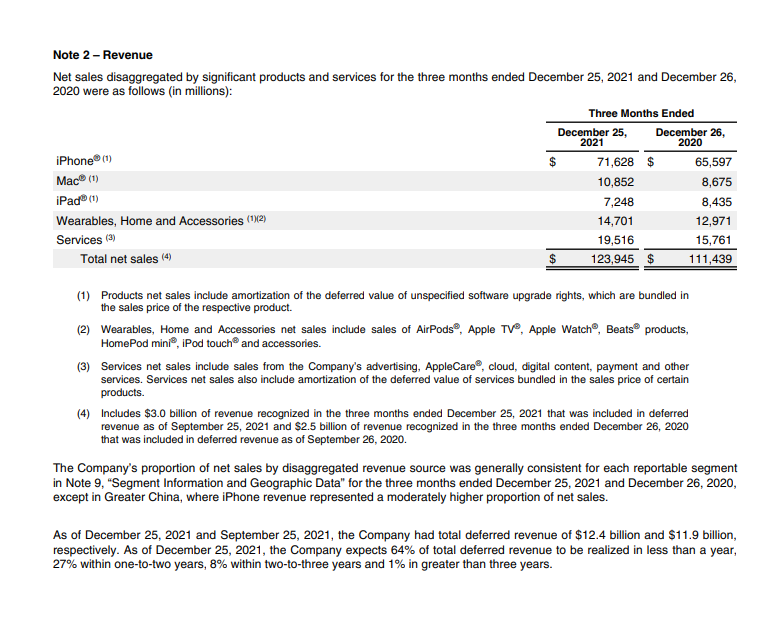

### Data Manipulation

#### Transforming into a dataframe

As usual, we will transform our extract into a more understandable and manipulable structure

In [207]:
# Calling Pandas DataFrame
qsr = pd.DataFrame(qsr)

# Inspecting the head of our dataframe
qsr.head()

,2022-06-25,2022-03-26,2021-12-25,2021-09-25,2021-06-26,2021-03-27,2020-12-26,2020-09-26,2020-06-27,2020-03-28,...,2013-03-30,2012-12-29,2012-09-29,2012-06-30,2012-03-31,2011-12-31,2011-09-24,2011-06-25,2011-03-26,2010-12-25
0,"{'Mac': 7382000000, 'Service': 19604000000, 'W...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,"{'Mac': 10435000000, 'Service': 19821000000, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"{'Mac': 10852000000, 'Service': 19516000000, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,"{'Mac': 9178000000.0, 'Service': 18277000000.0...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,"{'Mac': 8235000000, 'Service': 17486000000, 'W...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see here, it's not as easy as usual. We can clearly see that for each quarter, all the information have been put in a single cell of our dataframe.

Let's see how could explore the data by first calling our first column, first row information.

In [208]:
# We use iloc method to exctract info.
qsr.iloc[0,0]

{'Mac': 7382000000,
 'Service': 19604000000,
 'Wearables, Home and Accessories': 8084000000,
 'iPad': 7224000000,
 'iPhone': 40665000000}

As we can see, we were able to extract the information. Now let's check if we can transform this dictionnary into a Data Frame

In [209]:
# we transform our previous call
s3y22 = qsr.iloc[0,0]

# we put this into a DataFrame
s3y22 = pd.DataFrame(s3y22, index=[1])

# Let' inspect our dataframe
s3y22

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone
1,7382000000,19604000000,8084000000,7224000000,40665000000


As seen here, it's possible to extract every single row and transform it into a dataframe. We will now transform our JSON into a useable DataFrame

### Building Data

Let's proceed to run through our dictionnary and transform it into a more friendly useable format.

We want to have a dataframe that can be transposed with:
- on one of the index, the different categories,
- on the other index, the quarter to which each category correspondes.

As seen earlier in our extract, we have:
- a list of dictionnary,
- each dictionnary contains a signe key which is the quarter date,
- each value to each key is a dictionnary containing all the data.

We need to iterate through every single item at each level to build our dataframe.

#### Recalling our JSON

Let's re-explore our JSON

In [210]:
# Recalling our url
qsr = requests.get(url).json()

In [211]:
# Re-inspecting the structure of our call
qsr[:5]

[{'2022-06-25': {'Mac': 7382000000,
   'Service': 19604000000,
   'Wearables, Home and Accessories': 8084000000,
   'iPad': 7224000000,
   'iPhone': 40665000000}},
 {'2022-03-26': {'Mac': 10435000000,
   'Service': 19821000000,
   'Wearables, Home and Accessories': 8806000000,
   'iPad': 7646000000,
   'iPhone': 50570000000}},
 {'2021-12-25': {'Mac': 10852000000,
   'Service': 19516000000,
   'Wearables, Home and Accessories': 14701000000,
   'iPad': 7248000000,
   'iPhone': 71628000000}},
 {'2021-09-25': {'Mac': 9178000000.0,
   'Service': 18277000000.0,
   'Wearables, Home and Accessories': 8785000000.0,
   'iPad': 8252000000.0,
   'iPhone': 38868000000.0}},
 {'2021-06-26': {'Mac': 8235000000,
   'Service': 17486000000,
   'Wearables, Home and Accessories': 8775000000,
   'iPad': 7368000000,
   'iPhone': 39570000000}}]

#### Iterating through the several levels of our API

We are going to go step by step in the exploration of our API call:
- first through the **elements of our JSON list** which corresponds to all **dictionary**,
- then through the **keys of the first level dictionnary** which corresponds to **dates€€,
- then through **keys and values of the deeper (2nd level) dictionnary** which corresponds to **sales categories and their respective amount** for the given quarter.

In [212]:
# We iterate in the first level, which is a list of dictionnary
for item in qsr:
    print(item)

{'2022-06-25': {'Mac': 7382000000, 'Service': 19604000000, 'Wearables, Home and Accessories': 8084000000, 'iPad': 7224000000, 'iPhone': 40665000000}}
{'2022-03-26': {'Mac': 10435000000, 'Service': 19821000000, 'Wearables, Home and Accessories': 8806000000, 'iPad': 7646000000, 'iPhone': 50570000000}}
{'2021-12-25': {'Mac': 10852000000, 'Service': 19516000000, 'Wearables, Home and Accessories': 14701000000, 'iPad': 7248000000, 'iPhone': 71628000000}}
{'2021-09-25': {'Mac': 9178000000.0, 'Service': 18277000000.0, 'Wearables, Home and Accessories': 8785000000.0, 'iPad': 8252000000.0, 'iPhone': 38868000000.0}}
{'2021-06-26': {'Mac': 8235000000, 'Service': 17486000000, 'Wearables, Home and Accessories': 8775000000, 'iPad': 7368000000, 'iPhone': 39570000000}}
{'2021-03-27': {'Mac': 9102000000, 'Service': 16901000000, 'Wearables, Home and Accessories': 7836000000, 'iPad': 7807000000, 'iPhone': 47938000000}}
{'2020-12-26': {'Mac': 8675000000, 'Service': 15761000000, 'Wearables, Home and Accesso

We can see that we have a different structure at the end of our JSON. Before the last quarter of sales of 2018, information have been missing.

Taking that into account, we need to do our call on available and structure data only.

In [213]:
# We then iterate through all the keys of each element.
for item in qsr:
    for key in item.keys():
        print(key)

2022-06-25
2022-03-26
2021-12-25
2021-09-25
2021-06-26
2021-03-27
2020-12-26
2020-09-26
2020-06-27
2020-03-28
2019-12-28
2019-09-28
2019-06-29
2019-03-30
2018-12-29
2014-06-28
2014-03-29
2013-12-28
2013-09-28
2013-06-29
2013-03-30
2012-12-29
2012-09-29
2012-06-30
2012-03-31
2011-12-31
2011-09-24
2011-06-25
2011-03-26
2010-12-25


Keys provide the different dates at which quarter report has been out.

In [214]:
# Iteration through all the different level of our dictionnary try 1
# We check every item in the list of qsr
for item in qsr:
    # We check all the values in the dictionnary
    for values in item.values():
        print(values)

{'Mac': 7382000000, 'Service': 19604000000, 'Wearables, Home and Accessories': 8084000000, 'iPad': 7224000000, 'iPhone': 40665000000}
{'Mac': 10435000000, 'Service': 19821000000, 'Wearables, Home and Accessories': 8806000000, 'iPad': 7646000000, 'iPhone': 50570000000}
{'Mac': 10852000000, 'Service': 19516000000, 'Wearables, Home and Accessories': 14701000000, 'iPad': 7248000000, 'iPhone': 71628000000}
{'Mac': 9178000000.0, 'Service': 18277000000.0, 'Wearables, Home and Accessories': 8785000000.0, 'iPad': 8252000000.0, 'iPhone': 38868000000.0}
{'Mac': 8235000000, 'Service': 17486000000, 'Wearables, Home and Accessories': 8775000000, 'iPad': 7368000000, 'iPhone': 39570000000}
{'Mac': 9102000000, 'Service': 16901000000, 'Wearables, Home and Accessories': 7836000000, 'iPad': 7807000000, 'iPhone': 47938000000}
{'Mac': 8675000000, 'Service': 15761000000, 'Wearables, Home and Accessories': 12971000000, 'iPad': 8435000000, 'iPhone': 65597000000}
{'Mac': 9032000000.0, 'Service': 14549000000.0, 

Values correspond to all sales and categories. Categories are the main keys, and sales are the corresponding value.

We a way to exctract all the information, and transform them into a data frame.

We will use two was to do that:
- The first naive one when we transform our list into a numpy array,
- the second one where we do a list comprehension of dataframe stacked together.

#### Naive version: numpy array

We will go through every single items of our JSON call, build a numpy array, and then transform our numpy array into a DataFrame.

**First method** of array would consist of building a flat array, and reshaping the array to the DataFrame we want.

In [215]:
# First Method of array
arraylist = []
for quarter in qsr:
    for item in quarter.values():
        for sales in item.values():
            arraylist.append(sales)
            
print(arraylist)

[7382000000, 19604000000, 8084000000, 7224000000, 40665000000, 10435000000, 19821000000, 8806000000, 7646000000, 50570000000, 10852000000, 19516000000, 14701000000, 7248000000, 71628000000, 9178000000.0, 18277000000.0, 8785000000.0, 8252000000.0, 38868000000.0, 8235000000, 17486000000, 8775000000, 7368000000, 39570000000, 9102000000, 16901000000, 7836000000, 7807000000, 47938000000, 8675000000, 15761000000, 12971000000, 8435000000, 65597000000, 9032000000.0, 14549000000.0, 7876000000.0, 6797000000.0, 26444000000.0, 7079000000, 13156000000, 6450000000, 6582000000, 26418000000, 5351000000, 13348000000, 6284000000, 4368000000, 28962000000, 7160000000, 12715000000, 10010000000, 5977000000, 55957000000, 6991000000.0, 12511000000.0, 6520000000.0, 4656000000.0, 33362000000.0, 5820000000, 11455000000, 5525000000, 5023000000, 25986000000, 5513000000, 11450000000, 5129000000, 4872000000, 31051000000, 7416000000, 10875000000, 7308000000, 6729000000, 51982000000, 4104000000, 3963000000, 5227000000

In [216]:
# Let's check our array dimension
dfarray = np.array(arraylist)
print(dfarray.shape)

(110,)


We know that we want the quarters where all the information is available and available for an entire year before 2022.
This correspond to 3 years (2019, 2020, 2021) with 24 data entry points for each year, and two quarters of 2022 which correspondes to 12 data entry points.

In total, that would correspond to 24 * 3 + 12 = 72 + 12 = 84 data points.

We can slice through our array to eliminate all data points after the 84th one.

In [217]:
# Slicing through our array
dfarray = dfarray[:70,]

# Checking our array shape
print(dfarray.shape)

(70,)


Now we need to change the dimension of our array to make sure we get a 6 elements per line.

Knowing that we have three years plus two additional quarters, we have 14 lines.

In [218]:
# Changing the shape of our numpy array that corresponds to our targeted dataframe
dfarray = dfarray.reshape((14,5))

In [219]:
print(dfarray.shape)

(14, 5)


We need to build our index and column name for our Data Frame:
- index will correspond to the keys of our first layer dictionnary,
- columns will correspond to the name of each value.

In [220]:
# Building our index list
# Creating our empty list
index = []
# Iterating through the different existing dictionnary
for item in qsr:
    # Extracting the keys
    for key in item.keys():
        index.append(key)

# Extracting the right number of keys
index = index[:14]

# Checking our list and length
print(index)
print(len(index))

['2022-06-25', '2022-03-26', '2021-12-25', '2021-09-25', '2021-06-26', '2021-03-27', '2020-12-26', '2020-09-26', '2020-06-27', '2020-03-28', '2019-12-28', '2019-09-28', '2019-06-29', '2019-03-30']
14


In [221]:
# Building our columns name
# Creating our empty column list
columns = []

# We check every item in the list of qsr
for item in qsr:
    # We check all the values in the dictionnary
    for qrt in item.values():
            # Extracting all the keys of each array
            for key in qrt.keys():
                # Building our list
                columns.append(key)
                # Extracting the first column
                columns = columns[:5]

print(columns)

['Mac', 'Service', 'Wearables, Home and Accessories', 'iPad', 'iPhone']


We have our index and columns ready to build our dataframe.

NB: there could have been another method to extract our columns name like building another list, and checking if each value is unique.

In [222]:
# Finally building our DataFrame
df1 = pd.DataFrame(dfarray, columns=columns, index=index)

# Let's inspect our dataframe
df1.head()

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone
2022-06-25,7.382000e+09,1.960400e+10,8.084000e+09,7.224000e+09,4.066500e+10
2022-03-26,1.043500e+10,1.982100e+10,8.806000e+09,7.646000e+09,5.057000e+10
2021-12-25,1.085200e+10,1.951600e+10,1.470100e+10,7.248000e+09,7.162800e+10
2021-09-25,9.178000e+09,1.827700e+10,8.785000e+09,8.252000e+09,3.886800e+10
2021-06-26,8.235000e+09,1.748600e+10,8.775000e+09,7.368000e+09,3.957000e+10


Of course, there is still work to such as:
- changing the index type to timestamp,
- computing some additional data such as total sales, pourcentage of sales, etc.
- having some EDA of Apple's sales.

#### Second version: stacking pandas dataframe

In this version, we will create a stacked pandas dataframe by running through each dictionnary, transforming them into dataframe, and stacking them all together.

###### Building our list of dataframe

We first need to build a list with all the dataframes that we want to have in our main dataframe.

In [223]:
# Running through the different dictionnaries and creating our list of dataframes.
# We create an empty list that will contain our list of DataFrame
df_list = []

# We iterate through the values of our list which are dictionnaries
for item in qsr:
    
    # We iterate through the values of each dictionnary of our list
    for values in item.values():
        # We only keep the ones with the right shape
        if pd.DataFrame.from_dict(values.items()).transpose().shape == (2,5):
            # We append the each element to our list at the beginning
            # It's important to transpose each dataframe to have as a column the name of each categories of sales
            df_list.append(pd.DataFrame.from_dict(values.items()).transpose())

# We only keep the element we want for our analysis
df_list = df_list[:14]

# We should have 14 elements in our list
print(len(df_list))

# Inspecting the list
print(df_list[0])

14
            0            1                                2           3  \
0         Mac      Service  Wearables, Home and Accessories        iPad   
1  7382000000  19604000000                       8084000000  7224000000   

             4  
0       iPhone  
1  40665000000  


Our list consists of 2 by 5 dataframes which combines price and categories.

##### Preparing our dataframe elements: column and index

We prepare our column by iterating through our list, and our index by extracting the keys of our initial call.

In [224]:
# Preparing our columns
# Building and empty list
columns = []

# Going through our list
for i in range(0,5):
    columns.append(df_list[0][i][0])
    
print(columns)

['Mac', 'Service', 'Wearables, Home and Accessories', 'iPad', 'iPhone']


In [225]:
# Preparing our index

# Building our list
index = []

# Iteration through all the different element of our list, and the keys of our dictionnaries that are added to our index list
for item in qsr:
    for key in item.keys():
        index.append(key)

# Selecting the first 14 dates
index = index[:14]

# Inspecting
index

['2022-06-25',
 '2022-03-26',
 '2021-12-25',
 '2021-09-25',
 '2021-06-26',
 '2021-03-27',
 '2020-12-26',
 '2020-09-26',
 '2020-06-27',
 '2020-03-28',
 '2019-12-28',
 '2019-09-28',
 '2019-06-29',
 '2019-03-30']

##### Stacking our dataframe and editing

We are all set and ready. We can now build our dataframe of sales of Apple.

We will do that by:
- concatenating our list of dataframes,
- changing the column names using our list of column,
- changing the index using our list of index

In [226]:
# Concatenating our dataframe
df2 = pd.concat(df_list)

# Inspecting
df2.head()

,0,1,2,3,4
0,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone
1,7382000000,19604000000,8084000000,7224000000,40665000000
0,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone
1,10435000000,19821000000,8806000000,7646000000,50570000000
0,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone


We see that our concatenation of data has taken the row containing each categories for each concatenation. We need to get rid of those.

The easiest way is to filter indexes that are equal to 1.

In [227]:
# Removing unnecessary lines with filtering
df2 = df2[df2.index.values == 1]

# Inspecting
df2

,0,1,2,3,4
1,7382000000,19604000000,8084000000,7224000000,40665000000
1,10435000000,19821000000,8806000000,7646000000,50570000000
1,10852000000,19516000000,14701000000,7248000000,71628000000
1,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0
1,8235000000,17486000000,8775000000,7368000000,39570000000
1,9102000000,16901000000,7836000000,7807000000,47938000000
1,8675000000,15761000000,12971000000,8435000000,65597000000
1,9032000000.0,14549000000.0,7876000000.0,6797000000.0,26444000000.0
1,7079000000,13156000000,6450000000,6582000000,26418000000
1,5351000000,13348000000,6284000000,4368000000,28962000000


We then need to reset index

In [228]:
# We use the reset index method 
df2.reset_index(inplace=True)

In [229]:
# Inspecting
df2

,index,0,1,2,3,4
0,1,7382000000,19604000000,8084000000,7224000000,40665000000
1,1,10435000000,19821000000,8806000000,7646000000,50570000000
2,1,10852000000,19516000000,14701000000,7248000000,71628000000
3,1,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0
4,1,8235000000,17486000000,8775000000,7368000000,39570000000
5,1,9102000000,16901000000,7836000000,7807000000,47938000000
6,1,8675000000,15761000000,12971000000,8435000000,65597000000
7,1,9032000000.0,14549000000.0,7876000000.0,6797000000.0,26444000000.0
8,1,7079000000,13156000000,6450000000,6582000000,26418000000
9,1,5351000000,13348000000,6284000000,4368000000,28962000000


We now get rid of 'level_0' and 'index' column.

In [230]:
# using the drop method with inplace= True
df2.drop(columns=["index"], inplace=True)

In [231]:
# Inspecting
df2

,0,1,2,3,4
0,7382000000,19604000000,8084000000,7224000000,40665000000
1,10435000000,19821000000,8806000000,7646000000,50570000000
2,10852000000,19516000000,14701000000,7248000000,71628000000
3,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0
4,8235000000,17486000000,8775000000,7368000000,39570000000
5,9102000000,16901000000,7836000000,7807000000,47938000000
6,8675000000,15761000000,12971000000,8435000000,65597000000
7,9032000000.0,14549000000.0,7876000000.0,6797000000.0,26444000000.0
8,7079000000,13156000000,6450000000,6582000000,26418000000
9,5351000000,13348000000,6284000000,4368000000,28962000000


Now we need to change our column names and index names. We just need to call our list on the different attribute of our dataframe.

In [232]:
# We then rename our column
df2.columns=columns

In [233]:
df2.index=index

In [234]:
df2

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone
2022-06-25,7382000000,19604000000,8084000000,7224000000,40665000000
2022-03-26,10435000000,19821000000,8806000000,7646000000,50570000000
2021-12-25,10852000000,19516000000,14701000000,7248000000,71628000000
2021-09-25,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0
2021-06-26,8235000000,17486000000,8775000000,7368000000,39570000000
2021-03-27,9102000000,16901000000,7836000000,7807000000,47938000000
2020-12-26,8675000000,15761000000,12971000000,8435000000,65597000000
2020-09-26,9032000000.0,14549000000.0,7876000000.0,6797000000.0,26444000000.0
2020-06-27,7079000000,13156000000,6450000000,6582000000,26418000000
2020-03-28,5351000000,13348000000,6284000000,4368000000,28962000000


#### Conclusion on building our dataframe

The numpy technique and the pandas technique work pretty well. While numpy arrays are slightly more flexible in terms of data compared to the pandas datarame, the latter in terms of rapidy is easier to compute.

### Converting index to datetime index

One thing a lot of article omit that having the wrong type of index might not be very helpful when working.

Especially in finance and economics where data are mostly timeseries.

In [235]:
# Converting our dataframe index to datetime index
df2.index = pd.to_datetime(df2.index)

In [236]:
# Inspecting
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14 entries, 2022-06-25 to 2019-03-30
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Mac                              14 non-null     object
 1   Service                          14 non-null     object
 2   Wearables, Home and Accessories  14 non-null     object
 3   iPad                             14 non-null     object
 4   iPhone                           14 non-null     object
dtypes: object(5)
memory usage: 672.0+ bytes


## Sales analysis & datavisualization

Now that we have set up correctly our dataframe, we can dig into our sales.

We'll use the df2 dataframe as our main dataframe, though the df1 dataframe perfectly works as well.

Our goal is to understand the structure of revenue of Apple and be able to perform some visualization.

#### Total sales

Total sales will help us assess how well the company has been performing over the last quarters. By building a timeseries of sales, we will be able to perform some models that take into account exogenous data to analyze sales.

In [237]:
# Adding a total sales column to our dataframe
df2['total sales'] = df2.sum(axis=1)

In [238]:
# Inspecting
df2.head()

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone,total sales
2022-06-25,7382000000,19604000000,8084000000,7224000000,40665000000,8.295900e+10
2022-03-26,10435000000,19821000000,8806000000,7646000000,50570000000,9.727800e+10
2021-12-25,10852000000,19516000000,14701000000,7248000000,71628000000,1.239450e+11
2021-09-25,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0,8.336000e+10
2021-06-26,8235000000,17486000000,8775000000,7368000000,39570000000,8.143400e+10


In [239]:
# Sorting values through index
df2.sort_index(ascending=True, inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


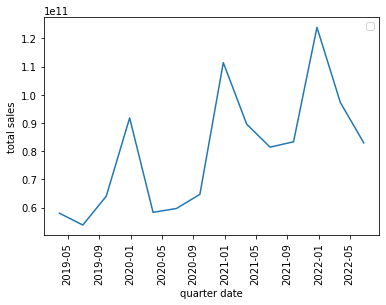

In [240]:
# We are going to draw a simple line plot using matplotlib
fig, ax = plt.subplots()
ax.plot(df2.index, df2['total sales'])
ax.set_xlabel('quarter date')
ax.set_ylabel('total sales')
ax.tick_params(axis='x', rotation=90)
ax.legend()

plt.show()

According to our graph, it seems that Apple makes the best sales the last quarter of each year.

Let's observe each sales individually.

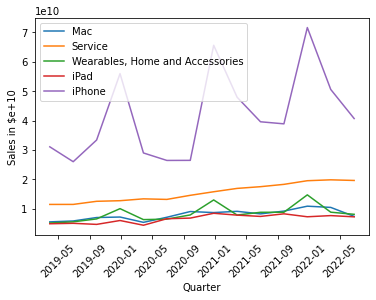

In [241]:
# We are setting up our plots
fig, ax = plt.subplots()

# Looping through all the different columns in our dataframe
for i in range(0,5):
    ax.plot(df2.index, df2[columns[i]], label=columns[i])
    

    
# Adding labels, legends, and some rotations to our parameters
ax.set_xlabel('Quarter')
ax.set_ylabel('Sales in $e+10')
ax.tick_params(axis='x', rotation=45)
ax.legend()

# Showing our plot
plt.show()

Iphones is the category that has the most impact on Apple Sales in the last 3 years.

Sales seems to also be higher in the last quarter of each year.

Let's sort values of our total sales in Apple's latest results.

In [242]:
# Sorting value in decreasing order using the total sales column
df2.sort_values('total sales', ascending=False)

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone,total sales
2021-12-25,10852000000,19516000000,14701000000,7248000000,71628000000,1.239450e+11
2020-12-26,8675000000,15761000000,12971000000,8435000000,65597000000,1.114390e+11
2022-03-26,10435000000,19821000000,8806000000,7646000000,50570000000,9.727800e+10
2019-12-28,7160000000,12715000000,10010000000,5977000000,55957000000,9.181900e+10
2021-03-27,9102000000,16901000000,7836000000,7807000000,47938000000,8.958400e+10
2021-09-25,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0,8.336000e+10
2022-06-25,7382000000,19604000000,8084000000,7224000000,40665000000,8.295900e+10
2021-06-26,8235000000,17486000000,8775000000,7368000000,39570000000,8.143400e+10
2020-09-26,9032000000.0,14549000000.0,7876000000.0,6797000000.0,26444000000.0,6.469800e+10
2019-09-28,6991000000.0,12511000000.0,6520000000.0,4656000000.0,33362000000.0,6.404000e+10


We don't have enough sales data on Apple in 22, but according to what we see, the time where they sell the most is during the last quarter of each year.

Let's now analyze piece by piece the sales of Apple: we want to build additional columns to our dataframe:
- share of mac in the total sales,
- share of service,
- share of wearables,
- share of ipad,
- share of iphone

Those numbers will be computed in pourcentage.

In [243]:
# computing our new columns
# We the list of our new columns names
shares = ['mac_share', 'service_share', 'accessories_share', 'ipad_share', 'iphone_share']

# We create a loop to go through our list and build our additional columns
for i in range(0,5):
    df2[shares[i]] = (df2[columns[i]]/df2['total sales'])*100

In [244]:
# Inspecting our new dataframe
df2.tail()

,Mac,Service,"Wearables, Home and Accessories",iPad,iPhone,total sales,mac_share,service_share,accessories_share,ipad_share,iphone_share
2021-06-26,8235000000,17486000000,8775000000,7368000000,39570000000,8.143400e+10,10.112484,21.472604,10.775597,9.047818,48.591497
2021-09-25,9178000000.0,18277000000.0,8785000000.0,8252000000.0,38868000000.0,8.336000e+10,11.010077,21.925384,10.538628,9.899232,46.626679
2021-12-25,10852000000,19516000000,14701000000,7248000000,71628000000,1.239450e+11,8.755496,15.745694,11.860906,5.847755,57.790149
2022-03-26,10435000000,19821000000,8806000000,7646000000,50570000000,9.727800e+10,10.726989,20.375624,9.052407,7.859948,51.985033
2022-06-25,7382000000,19604000000,8084000000,7224000000,40665000000,8.295900e+10,8.898371,23.63095,9.744573,8.707916,49.01819


It seems that our dataframe has become a bit too wide to fit on a our screen. Let's build a dataframe that only takes the total sales and the weight of each category. Let's call this new dataframe df_result.

In [245]:
# Using iloc to select all rows, and the last 6 columns of our df2 dataframe
df_result = df2.iloc[:,5:]

In [246]:
# Inspecting
df_result.head()

,total sales,mac_share,service_share,accessories_share,ipad_share,iphone_share
2019-03-30,5.801500e+10,9.502715,19.736275,8.840817,8.397828,53.522365
2019-06-29,5.380900e+10,10.816034,21.28826,10.267799,9.33487,48.293036
2019-09-28,6.404000e+10,10.916615,19.536227,10.181137,7.270456,52.095565
2019-12-28,9.181900e+10,7.79795,13.847896,10.901883,6.509546,60.942724
2020-03-28,5.831300e+10,9.176341,22.890265,10.776328,7.490611,49.666455


We can definitely see that iphone have the biggest share in the sales of Apple, followed by services.

Ipad have the smallest share of Apple's revenue.

Let's plot for 2021 the results:

In [247]:
# Building our DataFrame
df21 = df_result.loc['2021-03-27':'2021-12-25', 'mac_share':]

# Inspecting
df21

,mac_share,service_share,accessories_share,ipad_share,iphone_share
2021-03-27,10.160296,18.866092,8.747098,8.714726,53.511788
2021-06-26,10.112484,21.472604,10.775597,9.047818,48.591497
2021-09-25,11.010077,21.925384,10.538628,9.899232,46.626679
2021-12-25,8.755496,15.745694,11.860906,5.847755,57.790149


For graph reasons, we will change the index to a string index to have categorical bars.

In [248]:
# We use our quarters as 
df21.index = ['21q1', '21q2', '21q3', '21q4']

# Inspecting
df21

,mac_share,service_share,accessories_share,ipad_share,iphone_share
21q1,10.160296,18.866092,8.747098,8.714726,53.511788
21q2,10.112484,21.472604,10.775597,9.047818,48.591497
21q3,11.010077,21.925384,10.538628,9.899232,46.626679
21q4,8.755496,15.745694,11.860906,5.847755,57.790149


/var/folders/sn/wq_2w76s333b7xmhtx39fzs80000gn/T/ipykernel_59827/845338000.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df21.index, rotation=45)


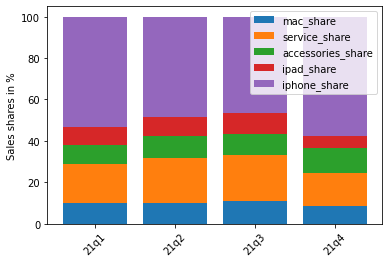

In [249]:
# Setting up all our subplots
fig, ax = plt.subplots()

# Editing each bars
ax.bar(df21.index, df21["mac_share"], label= "mac_share")
ax.bar(df21.index, df21["service_share"], label = "service_share", bottom = df21["mac_share"])
ax.bar(df21.index, df21["accessories_share"], label = "accessories_share", bottom = df21["service_share"] + df21["mac_share"])
ax.bar(df21.index, df21["ipad_share"], label = "ipad_share", bottom = df21["service_share"] + df21["mac_share"] + df21["accessories_share"])
ax.bar(df21.index, df21["iphone_share"], label = "iphone_share", bottom = df21["service_share"] + df21["mac_share"] + df21["accessories_share"] + df21["ipad_share"])

# Adding graphs element
ax.set_xticklabels(df21.index, rotation=45)
ax.set_ylabel("Sales shares in %")
ax.legend()

# Showing graphs
plt.show()